# Packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

# Read Serology Data

In [2]:
labels = pd.read_csv('Data/covid19serology_dictionary.csv').sort_values('order').drop('datatype',axis=1)
ordered_cols = list(labels['field_name'])
labels.head(100)

,field_name,order,definition
0,evaluation_id,A1,The unique identifier for each evaluation.
1,date_performed,A2,This is the date the test was performed.
2,days_from_symptom,A3,Days from symptom onset to blood collection.
3,manufacturer,B1,Name of manufacturer or company that makes thi...
4,device,B2,"This is the proprietary name, or trade name, o..."
5,lot_number,B3,The manufacturer's unique identification of th...
6,panel,F1,The testing program's unique identification of...
7,sample_id,F2,The unique ID of the sample in the panel.
8,sample_no,F3,The sequence in which the sample was tested.
9,type,F4,The sample material.


In [3]:
df = pd.read_csv('Data/covid19serology.csv')
df['date_performed'] = pd.to_datetime(df['date_performed'])
df = df[ordered_cols]
print(f"Records: {len(df)}")

Records: 13420


In [4]:
df.head(5)

,evaluation_id,date_performed,days_from_symptom,manufacturer,device,lot_number,panel,sample_id,sample_no,type,...,igg_agree,igg_titer,igg_truth,igm_result,igm_agree,igm_titer,igm_truth,pan_result,pan_agree,pan_titer
0,maf3377-a001,2020-09-18,NaN,EUROIMMUN Medizinische Labordiagnostika AG,Anti-SARS-CoV-2-NCP ELISA (IgM),E200703AO,Panel 3,C0019,104,Plasma,...,NaN,0,Negative,Negative,TN,0,Negative,NaN,NaN,0
1,maf3377-a001,2020-09-18,34.0,EUROIMMUN Medizinische Labordiagnostika AG,Anti-SARS-CoV-2-NCP ELISA (IgM),E200703AO,Panel 3,D0254,105,Serum,...,NaN,1600,Positive,Negative,FN,400,Positive,NaN,NaN,400
2,maf3378-a001,2020-09-28,32.0,Top Biotech Sdn. Bhd.,Top Rapid COVID-19 Rapid Antibody IgG/IgM Test...,TBCV04007001T,Panel 3,D0405,17,Serum,...,TP,400,Positive,Positive,TP,400,Positive,NaN,NaN,400
3,maf3378-a001,2020-09-28,NaN,Top Biotech Sdn. Bhd.,Top Rapid COVID-19 Rapid Antibody IgG/IgM Test...,TBCV04007001T,Panel 3,C0095,34,Plasma,...,TN,0,Negative,Positive,FP,0,Negative,NaN,NaN,0
4,maf3378-a001,2020-09-28,19.0,Top Biotech Sdn. Bhd.,Top Rapid COVID-19 Rapid Antibody IgG/IgM Test...,TBCV04007001T,Panel 3,D0349,36,Serum,...,TP,6400,Positive,Positive,TP,400,Positive,NaN,NaN,1600


# Summarize Data

In [5]:
for c in df.columns:
    print(f"{c}")
    print(f"  Unique Values-{len(df[c].unique())}")
    print(f"  Missing Values-{df[c].isnull().sum()}")

evaluation_id
  Unique Values-122
  Missing Values-0
date_performed
  Unique Values-61
  Missing Values-0
days_from_symptom
  Unique Values-28
  Missing Values-9966
manufacturer
  Unique Values-107
  Missing Values-0
device
  Unique Values-116
  Missing Values-0
lot_number
  Unique Values-108
  Missing Values-440
panel
  Unique Values-4
  Missing Values-0
sample_id
  Unique Values-237
  Missing Values-0
sample_no
  Unique Values-110
  Missing Values-0
type
  Unique Values-2
  Missing Values-0
group
  Unique Values-5
  Missing Values-0
control
  Unique Values-2
  Missing Values-5
antibody_agree
  Unique Values-5
  Missing Values-5
antibody_truth
  Unique Values-2
  Missing Values-0
igm_iga_result
  Unique Values-3
  Missing Values-13310
igm_iga_agree
  Unique Values-5
  Missing Values-13310
igm_igg_result
  Unique Values-3
  Missing Values-12870
igm_igg_agree
  Unique Values-5
  Missing Values-12870
iga_result
  Unique Values-4
  Missing Values-13310
iga_agree
  Unique Values-5
  Missin

In [6]:
df['days_from_symptom'].describe()

count    3454.000000
mean       27.610017
std         8.334654
min        17.000000
25%        21.000000
50%        25.000000
75%        32.000000
max        46.000000
Name: days_from_symptom, dtype: float64

In [7]:
df['date_performed'].describe()

count                            13420
mean     2020-08-15 13:43:52.131147520
min                2020-04-21 00:00:00
25%                2020-05-29 00:00:00
50%                2020-06-20 00:00:00
75%                2020-09-28 00:00:00
max                2022-07-28 00:00:00
Name: date_performed, dtype: object

In [8]:
df['group'].unique()

array(['Negative', 'Positive', 'HIV+', 'Negatives', 'Positives'],
      dtype=object)

In [9]:
df['igm_titer'].value_counts()

igm_titer
0       9760
100     1458
400     1374
1600     732
6400      96
Name: count, dtype: int64

# Accuracy metrics

In [11]:
def calculate_accuracy_metrics(df: pd.DataFrame, type: str):
    
    df_sensitivity = (
        df.loc[
            (df[f'{type}_truth']=='Positive') & (df[f'{type}_result'].isnull()==False)
        ].assign(
            tp_numerator = lambda x: x[f'{type}_result']=='Positive'
        ).groupby(
            ['manufacturer','device']
        ).agg(
            N_pos = (f'{type}_truth','count')
            ,TP = ('tp_numerator','mean')
        )
    )
    
    df_specificity = (
        df.loc[
            (df[f'{type}_truth']=='Negative') & (df[f'{type}_result'].isnull()==False)
        ].assign(
            tn_numerator = lambda x: x[f'{type}_result']=='Negative'
        ).groupby(
            ['manufacturer','device']
        ).agg(
            N_neg = (f'{type}_truth','count')
            ,TN = ('tn_numerator','mean')
        ).assign(
            FP = lambda x: 1- x['TN']
        )
    )
    
    
    joined = df_sensitivity.join(df_specificity).reset_index()
    
    return joined

In [12]:
df_igm = calculate_accuracy_metrics(df,'igm')
df_igg = calculate_accuracy_metrics(df,'igg')

In [15]:
df_igg.head(3)

,manufacturer,device,N_pos,TP,N_neg,TN,FP
0,Abacus Pharma International,SARS-CoV-2 IgM/IgG AB Antibody Rapid Test (Imm...,30,0.733333,80,0.9875,0.0125
1,Abbexa,COVID-19 IgG/IgM Rapid Test Kit,30,0.966667,80,0.9625,0.0375
2,Abbott,Architect i1000 SARS-CoV-2 IgG,30,0.900000,80,1.0000,0.0000


# Scatter

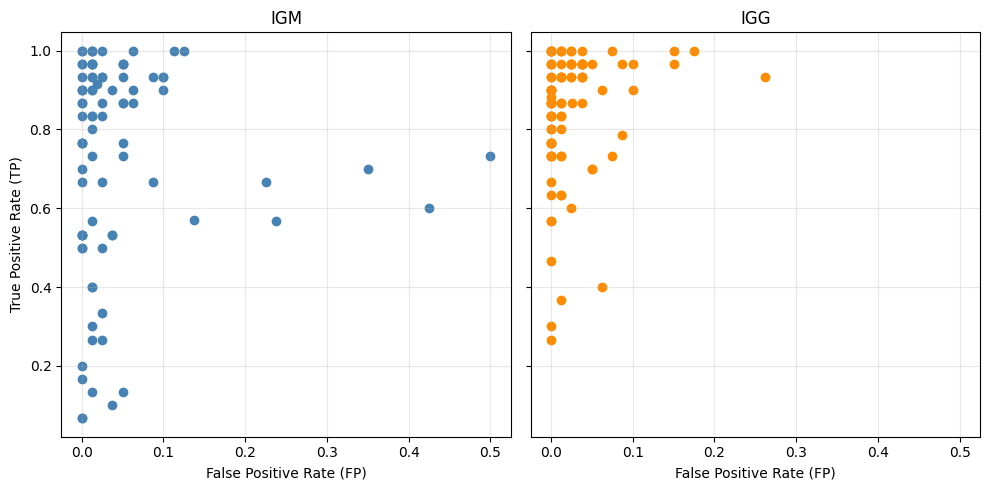

In [43]:
# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

# Left: IGM
ax1.scatter(df_igm["FP"], df_igm["TP"], color="steelblue")
ax1.set_title("IGM")
ax1.set_xlabel("False Positive Rate (FP)")
ax1.set_ylabel("True Positive Rate (TP)")
ax1.grid(True, alpha=0.3)

# Right: IGG
ax2.scatter(df_igg["FP"], df_igg["TP"], color="darkorange")
ax2.set_title("IGG")
ax2.set_xlabel("False Positive Rate (FP)")
ax2.grid(True, alpha=0.3)

# Tidy up layout
plt.tight_layout()
plt.show()

# K-Means

In [44]:
def k_means_and_plot(df: pd.DataFrame, k_final: int):
    # Features
    X = df[["FP", "TP"]]
    
    # --- Compute elbow ---
    inertias = []
    K = range(1, 10)
    for k in K:
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X)
        inertias.append(km.inertia_)
    
    # --- Fit final KMeans ---
    kmeans = KMeans(n_clusters=k_final, random_state=42)
    df["cluster"] = kmeans.fit_predict(X)
    
    # --- Plot side-by-side ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Left: Elbow
    ax1.plot(K, inertias, "o-")
    ax1.set_xlabel("Number of clusters (k)")
    ax1.set_ylabel("Inertia")
    ax1.set_title("Elbow Method")
    
    # Right: Clusters
    sc = ax2.scatter(df["FP"], df["TP"], c=df["cluster"], cmap="viridis", s=60)
    ax2.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        c="red", s=120, marker="x", label="Centroids"
    )
    ax2.set_xlabel("FP")
    ax2.set_ylabel("TP")
    ax2.set_title(f"K-Means Clusters (k={k_final})")
    ax2.legend(loc="best")
    
    # If TP/TN are rates, uncomment to standardize axes:
    # for ax in (ax1, ax2): pass
    # ax2.set_xlim(0, 1); ax2.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

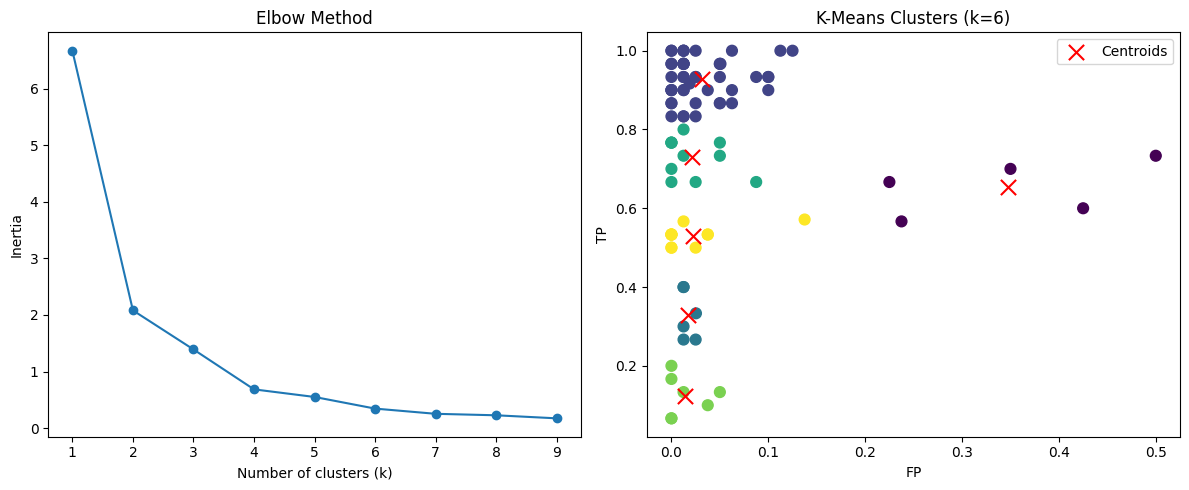

In [45]:
k_means_and_plot(df_igm, 6)

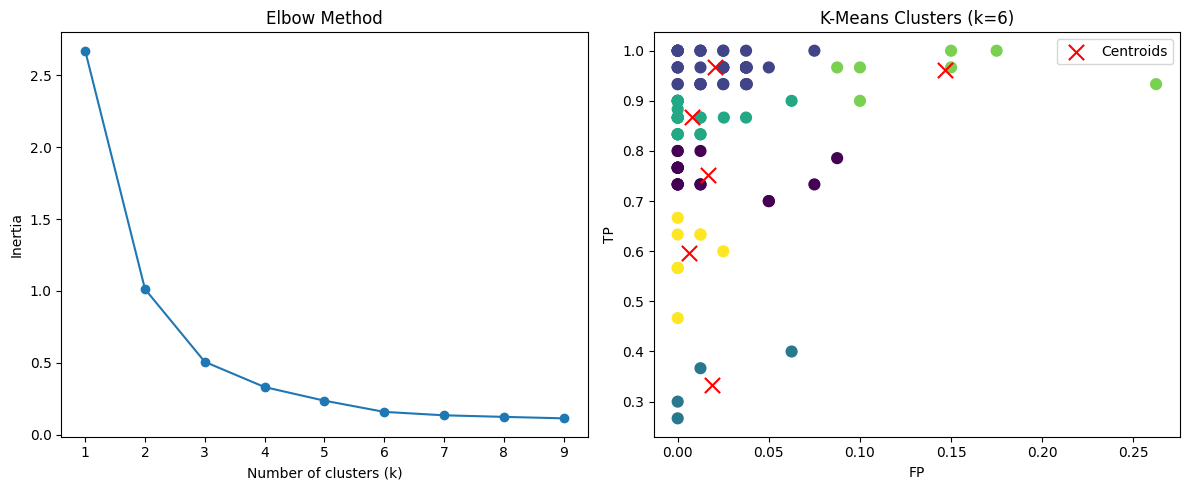

In [46]:
k_means_and_plot(df_igg, 6)

# Logistic

In [37]:
# type = 'igg'
# 
# df_sensitivity = (
#     df.loc[
#         (df[f'{type}_truth']=='Positive') & (df[f'{type}_result'].isnull()==False)
#     ].assign(
#         tp_numerator = lambda x: (x[f'{type}_result']=='Positive').astype(int)
#     )
# )

In [38]:
# # Data
# X = df_sensitivity[["igg_titer"]].to_numpy()
# y = df_sensitivity["tp_numerator"].to_numpy()
# 
# # --- Scatter (binary y) ---
# # Optional jitter so 0/1 points don't stack perfectly on the lines:
# rng = np.random.default_rng(42)
# y_jitter = y + rng.uniform(-0.02, 0.02, size=y.shape)
# 
# plt.figure(figsize=(8, 5))
# plt.scatter(df_sensitivity["igg_titer"], y_jitter, s=30, alpha=0.6, label="Observed (with jitter)")
# 
# # --- Logistic regression fit ---
# clf = LogisticRegression()
# clf.fit(X, y)
# 
# # Smooth curve over the x range
# xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
# yy = clf.predict_proba(xx)[:, 1]
# 
# plt.plot(xx, yy, linewidth=2, label="Logistic fit")
# 
# # Cosmetics
# plt.xlabel("IGG titer")
# plt.ylabel("TP numerator (0/1) / P(TP=1)")
# plt.yticks([0, 0.5, 1])
# plt.ylim(-0.1, 1.1)
# plt.title("IGG titer vs TP (with logistic curve)")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()